# Q1 What does require mean?
require() tries to load the package using library() and return a logical value indicating success or failure.

In [1]:
library("maps")
library("usmap")
library("ggplot2")

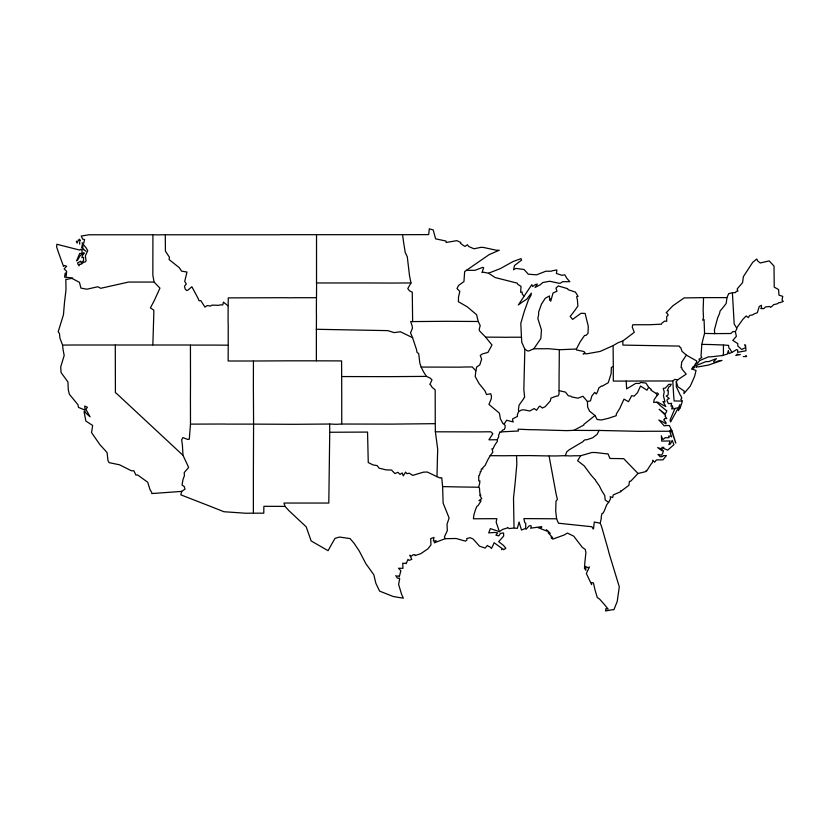

In [2]:
map("state")

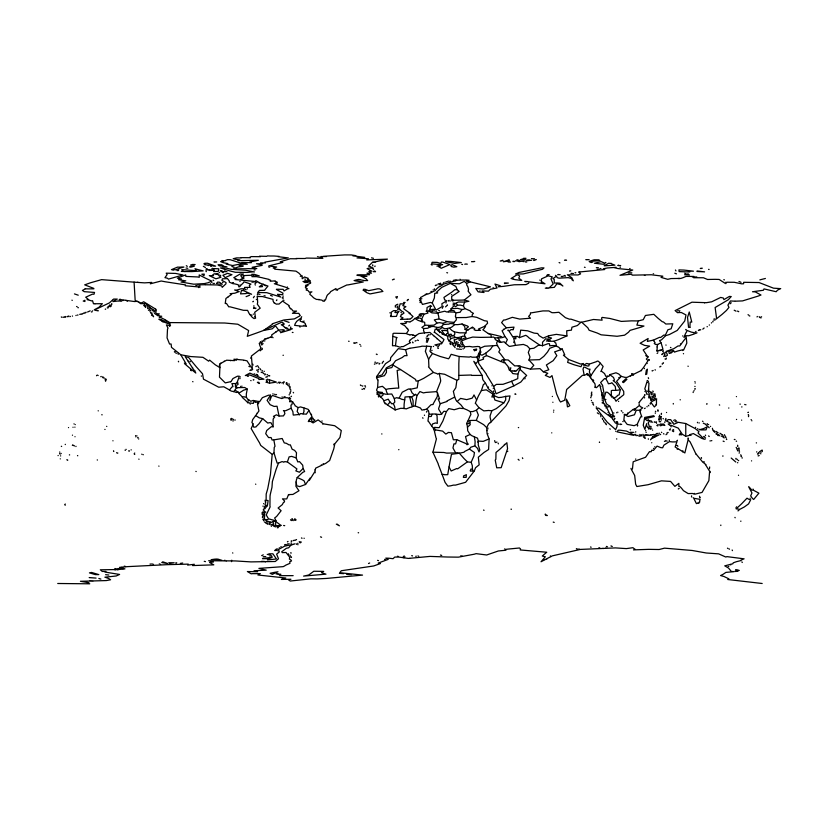

In [3]:
map("world")

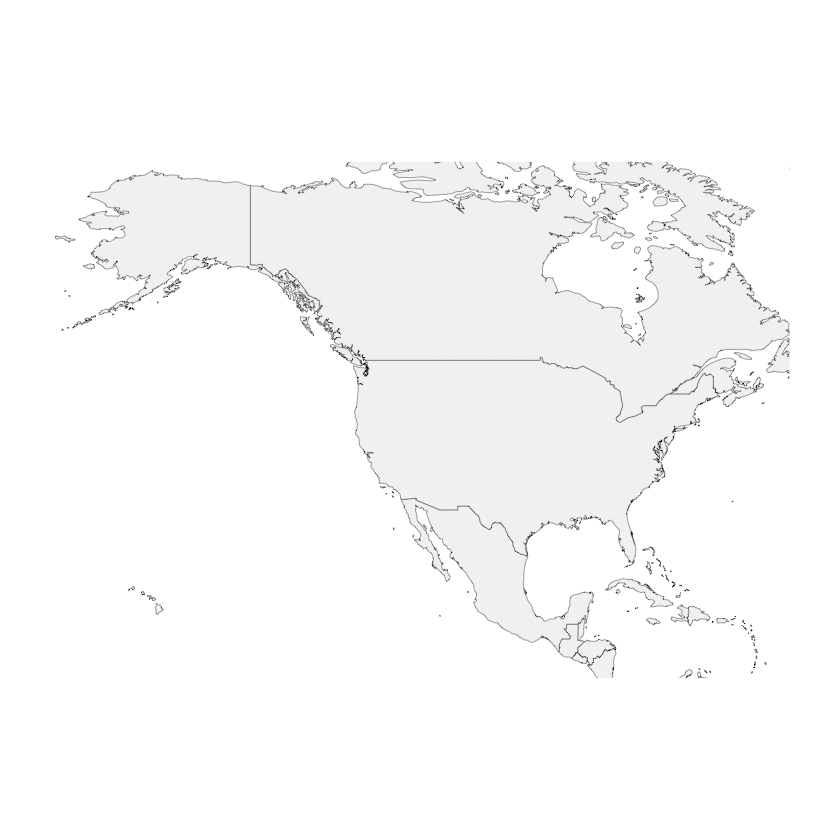

In [4]:
xlim <- c(-171.738281, -56.601563)
ylim <- c(12.039321, 71.856229)
map("world", col="#f3f3f3", fill=TRUE, bg="white", lwd=0.3, xlim=xlim, ylim = ylim)

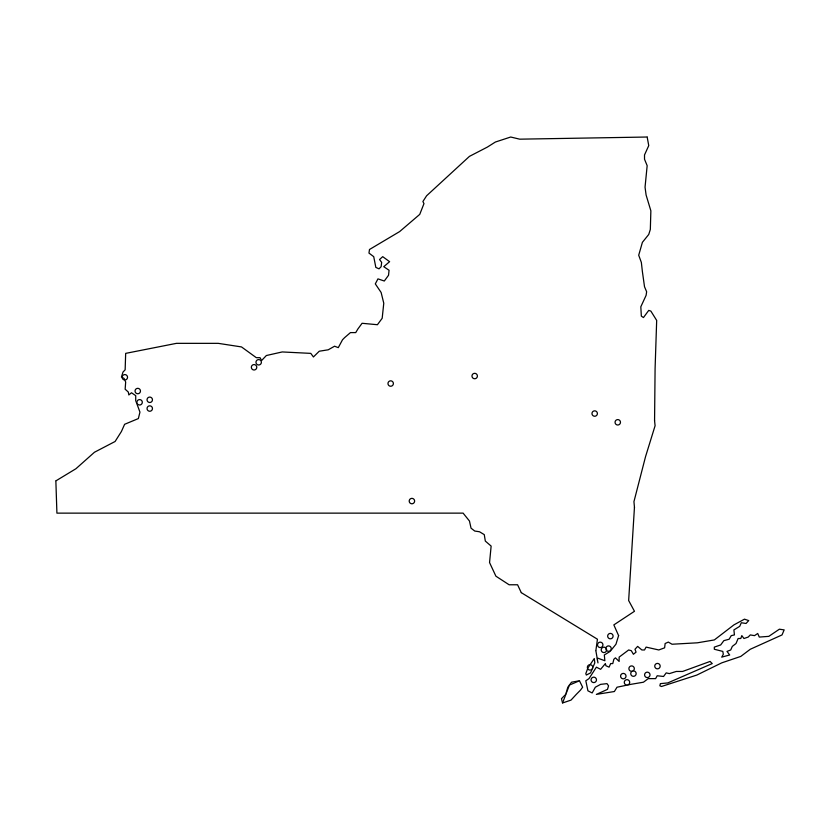

In [5]:
map("state", "New York")
data(us.cities)
map.cities(us.cities, country = "NY")

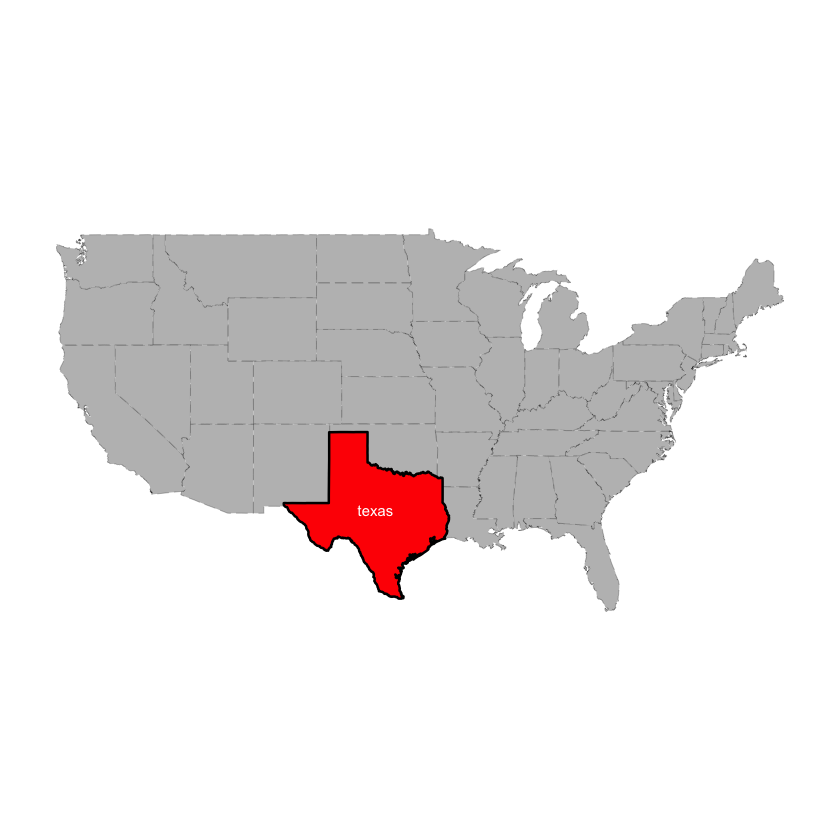

In [6]:
map("state", col= "grey", boundary=TRUE, fill= TRUE, lty= 5,lwd= 0.2)
map("state", regions= "texas", col = "red", fill= TRUE, add= TRUE, lty= 1, lwd= 2)
map.text("state","texas", col="white", add= TRUE)

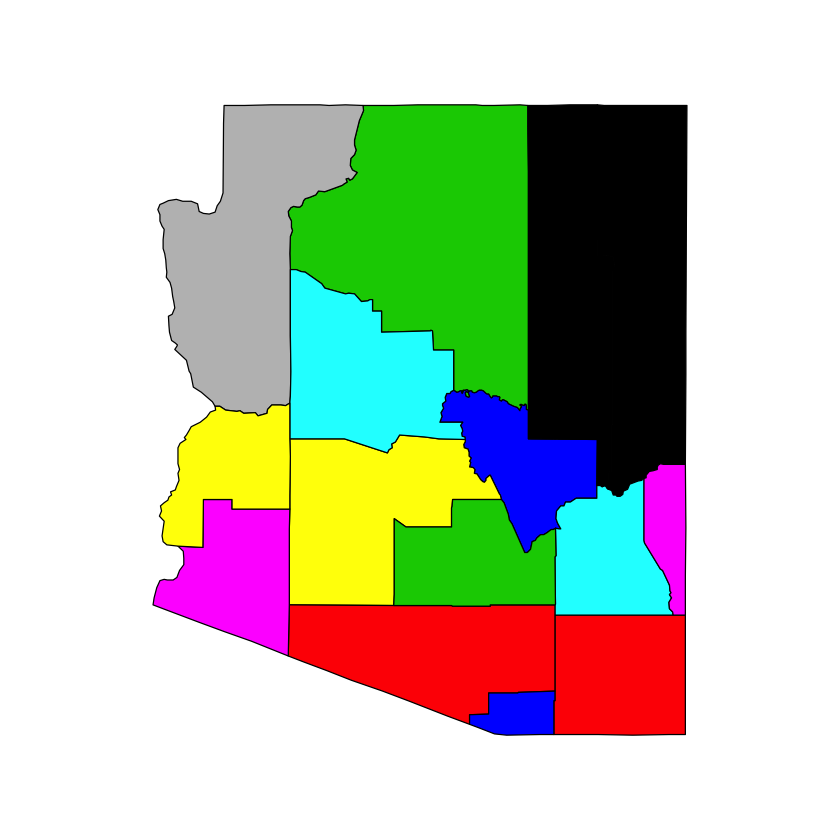

In [7]:
map('county', 'arizona', fill = TRUE, col = palette())
all_county_data <- map_data("county")

# Q2: how do you map election data to az county map?   (Bonus 5pt for assign2)
Use include=c("AZ") to filter out only AZ state. 
AZ_county_data from previous block has fips and values column to map.

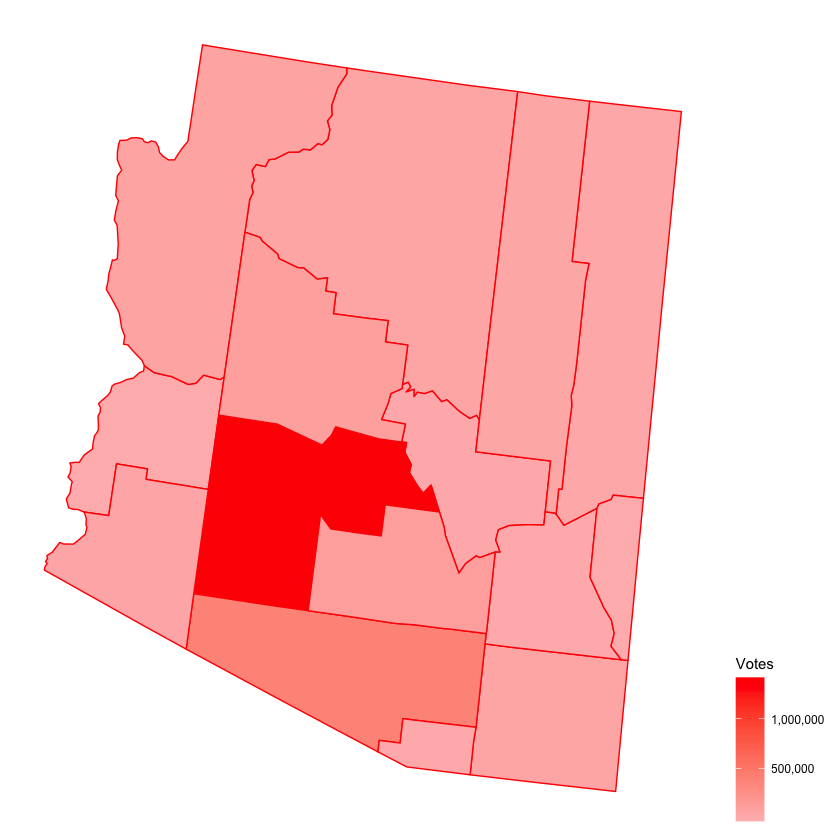

In [2]:
#import required libraries
library("usmap")
library("ggplot2")

#read data and change column names
electionData <- read.table("elpo12p010g.csv", header=TRUE, sep=",",)
AZ_county_data = subset(electionData[electionData$STATE == 'AZ',], select = c('FIPS','TTL_VT'))
colnames(AZ_county_data) = c("fips", "value")

#Use include=c("AZ") to filter out only AZ state. AZ_county_data from previous block has fips and values column to map.
plot_usmap(include=c("AZ"),data = AZ_county_data, values = "value", color = "red") + 
    scale_fill_continuous( low = "#ffbaba", high = "red", name = "Votes", label = scales::comma) +
    theme(legend.position = "right")

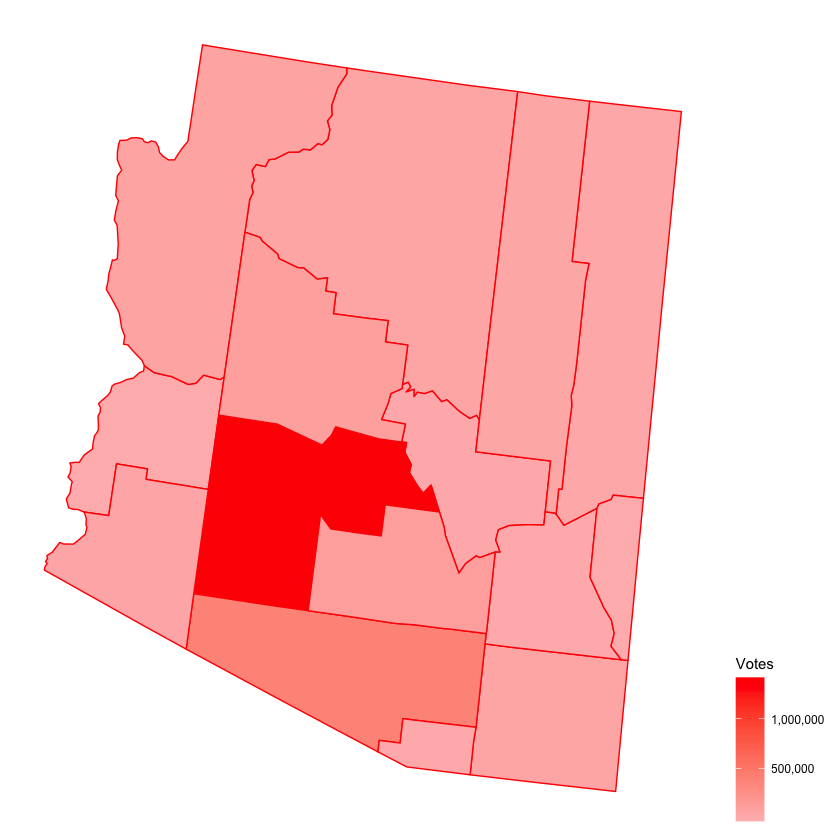

In [11]:
plot_usmap(include=c("AZ"),data = AZ_county_data, values = "value", color = "red") + 
    scale_fill_continuous( low = "#ffbaba", high = "red", name = "Votes", label = scales::comma) +
    theme(legend.position = "right")

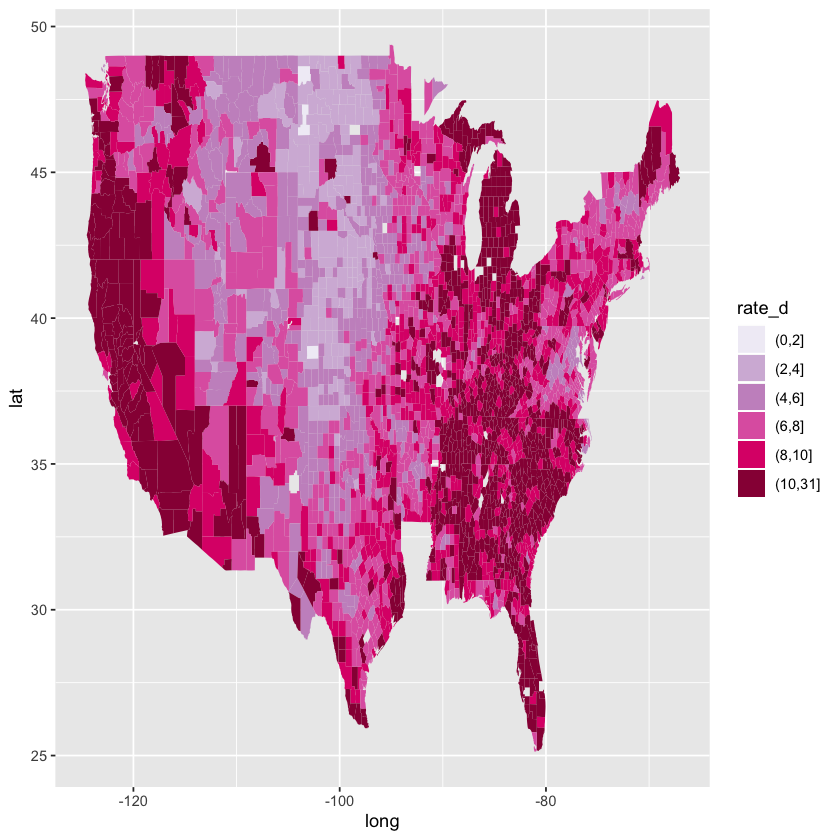

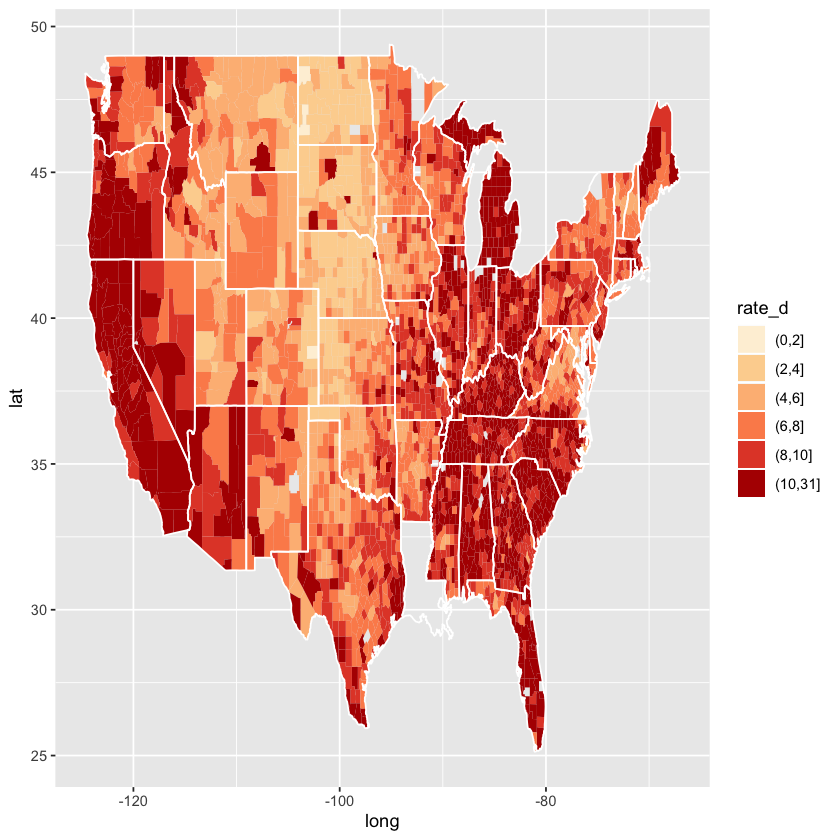

In [4]:
library(ggplot2)
library(maps)
require(scales)

unemployment <- read.csv("unemployment.csv", header= F, stringsAsFactors= F)
names(unemployment) <- c("id", "state_fips", "county_fips", "name", "year", "?", "?", "?", "rate")

unemployment$county <- tolower(gsub(" County, [A-Z]{2}", "", unemployment$name))
unemployment$state <- gsub("^.*([A-Z]{2})", "\\1", unemployment$name)

county_df <- map_data("county")
names(county_df) <- c("long", "lat", "group", "order", "state_name", "county")

county_df$state <- state.abb[match(county_df$state_name, tolower(state.name))]

county_df$state_name <- NULL

# Combine together 
choropleth <- merge(county_df, unemployment, by= c("state", "county"))

choropleth <- choropleth[order(choropleth$order), ]
# Discretise rate to use with Brewer color scheme 
#choropleth$rate_d <- cut_number(choropleth$rate, 5) #(Figure 11)
#choropleth$rate_d <- cut_interval(choropleth$rate, 5) #min~max 
choropleth$rate_d <- cut(choropleth$rate, breaks = c(seq(0, 10, by = 2), 31)) #(Figure 10)
# plot the employment rate by counties across America into bins
ggplot(choropleth, aes(long, lat, group = group)) + scale_fill_brewer(palette = "PuRd") + geom_polygon(aes(fill = rate_d))


state_df <- map_data("state")

ggplot(choropleth, aes(long, lat, group= group)) + scale_fill_brewer(palette = "OrRd")+ geom_polygon(aes(fill= rate_d)) + geom_polygon(data= state_df, colour= "white", fill = NA) 


In [10]:
unemployment <- read.csv("unemployment.csv", header= F, stringsAsFactors= F)
head(unemployment)

,V1,V2,V3,V4,V5,V6,V7,V8,V9
,<chr>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>
1,CN010010,1,1,"Autauga County, AL",2009,"23,288","21,025","2,263",9.7
2,PA011000,1,3,"Baldwin County, AL",2009,"81,706","74,238","7,468",9.1
3,CN010050,1,5,"Barbour County, AL",2009,"9,703","8,401","1,302",13.4
4,CN010070,1,7,"Bibb County, AL",2009,"8,475","7,453","1,022",12.1
5,CN010090,1,9,"Blount County, AL",2009,"25,306","22,789","2,517",9.9
6,CN010110,1,11,"Bullock County, AL",2009,"3,527","2,948",579,16.4


In [11]:
names(unemployment) <- c("id", "state_fips", "county_fips", "name", "year", "?", "?", "?", "rate")
head(unemployment)

,id,state_fips,county_fips,name,year,?,?,?,rate
,<chr>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>
1,CN010010,1,1,"Autauga County, AL",2009,"23,288","21,025","2,263",9.7
2,PA011000,1,3,"Baldwin County, AL",2009,"81,706","74,238","7,468",9.1
3,CN010050,1,5,"Barbour County, AL",2009,"9,703","8,401","1,302",13.4
4,CN010070,1,7,"Bibb County, AL",2009,"8,475","7,453","1,022",12.1
5,CN010090,1,9,"Blount County, AL",2009,"25,306","22,789","2,517",9.9
6,CN010110,1,11,"Bullock County, AL",2009,"3,527","2,948",579,16.4


In [17]:
unemployment$county <- tolower(gsub(" (County|Parish), [A-Z]{2}", "", unemployment$name))

In [14]:
unemployment$county_la <- tolower(gsub(" Parish, [A-Z]{2}", "", unemployment$name))

In [19]:
sqldf("select * from unemployment")

ERROR: Error in sqldf("select * from unemployment"): could not find function "sqldf"


In [21]:
library("sqldf")

ERROR: Error in library("sqldf"): there is no package called ‘sqldf’


In [23]:
grep("ex","asaex",value=T)

[1] "asaex"